# Clustering songs
## Instructions
Now it's time to cluster the songs of the hot_songs and not_hot_songs databases according to the song's audio features. For this purpose, you need to consider the following questions:

- Are you going to use all the audio features? If not, which ones do you think that makes more sense to be used?
- What is the optimal number of clusters (for methods that need to know this beforehand)?
- What is the best distance to use?
- What clustering method provides better results?
- Does the clustering method need a transformer?

**IMPORTANT** 
- Save the models into your disk in order to be able to use the best model later.
- Concatenate hot_songs and not_hot_songs dataframes (create a column called "dataset" to flag to which dataframe it belongs).
- Finally, add new column to the full dataset for each clustering method with the cluster membership of each song.



In [1]:
# import libraries
import pandas as pd

In [9]:
not_hot_songs = pd.read_csv('not_hot_songs_features.csv') # big dataframe (with not-hot songs)
display(not_hot_songs.head())
hot_songs = pd.read_csv('hot_songs_features.csv') # small dataframe (with hot songs)
display(hot_songs.head())

,titles,artists,ids,index,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Twelfth Street Rag,Pee Wee Hunt,0Ec85AbUzt5SRDnsiBodml,0Ec85AbUzt5SRDnsiBodml,0.530,0.5700,10,-7.942,1,0.0559,...,0.1020,0.9430,105.621,audio_features,0Ec85AbUzt5SRDnsiBodml,spotify:track:0Ec85AbUzt5SRDnsiBodml,https://api.spotify.com/v1/tracks/0Ec85AbUzt5S...,https://api.spotify.com/v1/audio-analysis/0Ec8...,174027,4
1,Mañana (Is Soon Enough for Me),Peggy Lee,3baBjQISAznjkg8WwzipPM,3baBjQISAznjkg8WwzipPM,0.751,0.5660,2,-13.624,0,0.1020,...,0.2720,0.9350,122.282,audio_features,3baBjQISAznjkg8WwzipPM,spotify:track:3baBjQISAznjkg8WwzipPM,https://api.spotify.com/v1/tracks/3baBjQISAznj...,https://api.spotify.com/v1/audio-analysis/3baB...,178733,4
2,Now Is the Hour,Bing Crosby,5eKva6ek6QTxwtYAioGWqX,5eKva6ek6QTxwtYAioGWqX,0.193,0.0465,1,-21.226,1,0.0326,...,0.0993,0.2440,83.573,audio_features,5eKva6ek6QTxwtYAioGWqX,spotify:track:5eKva6ek6QTxwtYAioGWqX,https://api.spotify.com/v1/tracks/5eKva6ek6QTx...,https://api.spotify.com/v1/audio-analysis/5eKv...,189293,3
3,A Tree in the Meadow,Margaret Whiting,1y4crDPPIzcTiOhBE5KRDJ,1y4crDPPIzcTiOhBE5KRDJ,0.303,0.0912,9,-14.795,1,0.0336,...,0.0917,0.0822,88.313,audio_features,1y4crDPPIzcTiOhBE5KRDJ,spotify:track:1y4crDPPIzcTiOhBE5KRDJ,https://api.spotify.com/v1/tracks/1y4crDPPIzcT...,https://api.spotify.com/v1/audio-analysis/1y4c...,160392,4
4,"You Can't Be True, Dear",Ken Griffin,13J3nj3RP6YjcG6bgFD9gj,13J3nj3RP6YjcG6bgFD9gj,0.239,0.2930,0,-9.260,1,0.0346,...,0.3780,0.4400,104.710,audio_features,13J3nj3RP6YjcG6bgFD9gj,spotify:track:13J3nj3RP6YjcG6bgFD9gj,https://api.spotify.com/v1/tracks/13J3nj3RP6Yj...,https://api.spotify.com/v1/audio-analysis/13J3...,157814,4


,titles,artists,ids,index,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,1,0.0391,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,...,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,1,0.1870,...,0.1010,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0,0.0332,...,0.0837,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3


Add new column to distinguish between dataframes and merge

In [10]:
hot_songs['dataset'] = "hot"
not_hot_songs['dataset'] = "not_hot"

In [11]:
display(hot_songs.shape)
display(not_hot_songs.shape)

(100, 23)

(2240, 23)

In [12]:
all_songs = pd.concat([hot_songs, not_hot_songs], axis=0).reset_index(drop=True)

display(all_songs.shape)
display(all_songs.head(15))

(2340, 23)

,titles,artists,ids,index,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,dataset
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,1,0.0391,...,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,hot
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,...,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,hot
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,...,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,hot
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,1,0.1870,...,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,hot
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0,0.0332,...,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,hot
5,Creepin',"Metro Boomin, The Weeknd & 21 Savage",2dHHgzDwk4BJdRwy9uXhTO,2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,...,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,hot
6,Calm Down,Rema & Selena Gomez,1s7oOCT8vauUh01PbJD6ps,1s7oOCT8vauUh01PbJD6ps,0.799,0.802,11,-5.196,1,0.0371,...,0.811,107.008,audio_features,1s7oOCT8vauUh01PbJD6ps,spotify:track:1s7oOCT8vauUh01PbJD6ps,https://api.spotify.com/v1/tracks/1s7oOCT8vauU...,https://api.spotify.com/v1/audio-analysis/1s7o...,239318,4,hot
7,Die For You,The Weeknd & Ariana Grande,7oDd86yk8itslrA9HRP2ki,7oDd86yk8itslrA9HRP2ki,0.531,0.525,1,-6.500,0,0.0671,...,0.502,66.900,audio_features,7oDd86yk8itslrA9HRP2ki,spotify:track:7oDd86yk8itslrA9HRP2ki,https://api.spotify.com/v1/tracks/7oDd86yk8its...,https://api.spotify.com/v1/audio-analysis/7oDd...,232857,4,hot
8,Search & Rescue,Drake,7aRCf5cLOFN1U7kvtChY1G,7aRCf5cLOFN1U7kvtChY1G,0.817,0.440,10,-8.482,0,0.0734,...,0.544,142.024,audio_features,7aRCf5cLOFN1U7kvtChY1G,spotify:track:7aRCf5cLOFN1U7kvtChY1G,https://api.spotify.com/v1/tracks/7aRCf5cLOFN1...,https://api.spotify.com/v1/audio-analysis/7aRC...,272113,4,hot
9,"Boy's A Liar, Pt. 2",PinkPantheress & Ice Spice,6AQbmUe0Qwf5PZnt4HmTXv,6AQbmUe0Qwf5PZnt4HmTXv,0.696,0.809,5,-8.254,1,0.0500,...,0.857,132.962,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4,hot


In [13]:
all_songs.columns

Index(['titles', 'artists', 'ids', 'index', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'dataset'],
      dtype='object')

In [85]:
all_songs_clean = all_songs.drop(['index', 'id', 'mode', 'type', 'analysis_url', 'uri'], axis=1)
display(all_songs_clean.columns)
display(all_songs_clean.head())

Index(['titles', 'artists', 'ids', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_href', 'duration_ms', 'time_signature',
       'dataset'],
      dtype='object')

,titles,artists,ids,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,time_signature,dataset
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,153947,4,hot
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,163855,4,hot
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,200455,4,hot
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,172125,4,hot
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,165671,3,hot


In [17]:
X = all_songs_clean[['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature']]
display(X.head())
display(X.shape)

,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.644,0.735,0.0521,0.144000,0.418,88.980,4
1,0.517,0.675,0.4590,0.000000,0.518,203.853,4
2,0.707,0.681,0.0632,0.000005,0.646,117.999,4
3,0.898,0.676,0.1400,0.000000,0.742,147.991,4
4,0.668,0.758,0.4830,0.000019,0.834,147.989,3


(2340, 7)

Check statistics of numerical

In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,2340.0,0.621076,0.155144,0.168000,0.521750,0.638000,0.731000,0.980
energy,2340.0,0.602426,0.198929,0.026400,0.468000,0.619000,0.758250,0.989
acousticness,2340.0,0.293136,0.283074,0.000017,0.051825,0.189500,0.492000,0.994
instrumentalness,2340.0,0.028906,0.131291,0.000000,0.000000,0.000004,0.000317,0.955
valence,2340.0,0.594491,0.240582,0.038100,0.405000,0.604500,0.802250,0.977
tempo,2340.0,118.750655,27.691146,48.194000,97.994750,117.952000,133.732750,208.571
time_signature,2340.0,3.941880,0.289547,1.000000,4.000000,4.000000,4.000000,5.000


## Clustering

In [20]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

#### Scale

In [33]:
import pickle

scaler = StandardScaler() # create instance
scaler.fit(X) # fit with my data
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename -> where we want to save the scaler

# save scaler ALWAYS after the fit.

with open(filename, "wb") as file: # we use a context manager to save the scaler: w: write, b: binary mode 
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
print("Before scaling")
display(X.head())
print()
print("After scaling")
display(X_scaled_df.head())

Before scaling


,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.644,0.735,0.0521,0.144000,0.418,88.980,4
1,0.517,0.675,0.4590,0.000000,0.518,203.853,4
2,0.707,0.681,0.0632,0.000005,0.646,117.999,4
3,0.898,0.676,0.1400,0.000000,0.742,147.991,4
4,0.668,0.758,0.4830,0.000019,0.834,147.989,3



After scaling


,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.147788,0.666583,-0.851676,0.876820,-0.733755,-1.075326,0.200769
1,-0.670982,0.364903,0.586063,-0.220211,-0.318008,3.073926,0.200769
2,0.553950,0.395071,-0.812455,-0.220172,0.214149,-0.027150,0.200769
3,1.785328,0.369931,-0.541090,-0.220211,0.613266,1.056171,0.200769
4,0.302516,0.782227,0.670864,-0.220067,0.995754,1.056099,-3.253641


In [22]:
# double check correct number of rows and columns
X_scaled_df.shape

(2340, 7)

In [24]:
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,2340.0,4.267242e-16,1.000214,-2.920988,-0.640359,0.109106,0.708678,2.313983
energy,2340.0,3.561728e-16,1.000214,-2.896253,-0.675891,0.083336,0.783484,1.943693
acousticness,2340.0,-8.184336e-18,1.000214,-1.035705,-0.852648,-0.366187,0.702665,2.476429
instrumentalness,2340.0,-1.013672e-15,1.000214,-0.220211,-0.220211,-0.220184,-0.217796,7.055238
valence,2340.0,2.910184e-16,1.000214,-2.313179,-0.787802,0.041614,0.863754,1.590272
tempo,2340.0,-3.366728e-16,1.000214,-2.548531,-0.749710,-0.028848,0.541158,3.244342
time_signature,2340.0,-2.873698e-15,1.000214,-10.162460,0.200769,0.200769,0.200769,3.655179


#### K-Means

#### Choosing K
- Use inertia: compute it for several K values and then use the "elbow method" to choose the best K.
- Use silhouette score to also assess the best K together with "elbow method"
- Leave all the other parameters as they are (only fix random_state and "switch on" verbose to be able to follow the progress)

Training a K-Means model with 3 clusters! 

Initialization complete
Iteration 0, inertia 14384.622250729515
Iteration 1, inertia 12071.821997629575
Iteration 2, inertia 11323.164472741866
Iteration 3, inertia 11176.06362811286
Iteration 4, inertia 11119.681331173815
Iteration 5, inertia 11083.552705217631
Iteration 6, inertia 11062.259724544665
Iteration 7, inertia 11054.460164375876
Iteration 8, inertia 11051.20536897907
Iteration 9, inertia 11050.096138908539
Iteration 10, inertia 11049.502752561992
Iteration 11, inertia 11049.211300720712
Iteration 12, inertia 11048.99152755801
Converged at iteration 12: center shift 3.493630676637386e-05 within tolerance 0.00010000000000000095.
Initialization complete
Iteration 0, inertia 15417.144756673015
Iteration 1, inertia 12141.529484358734
Iteration 2, inertia 11923.295018097268
Iteration 3, inertia 11805.371034376978
Iteration 4, inertia 11746.215673620616
Iteration 5, inertia 11705.557543344625
Iteration 6, inertia 11679.623454280274
Itera

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

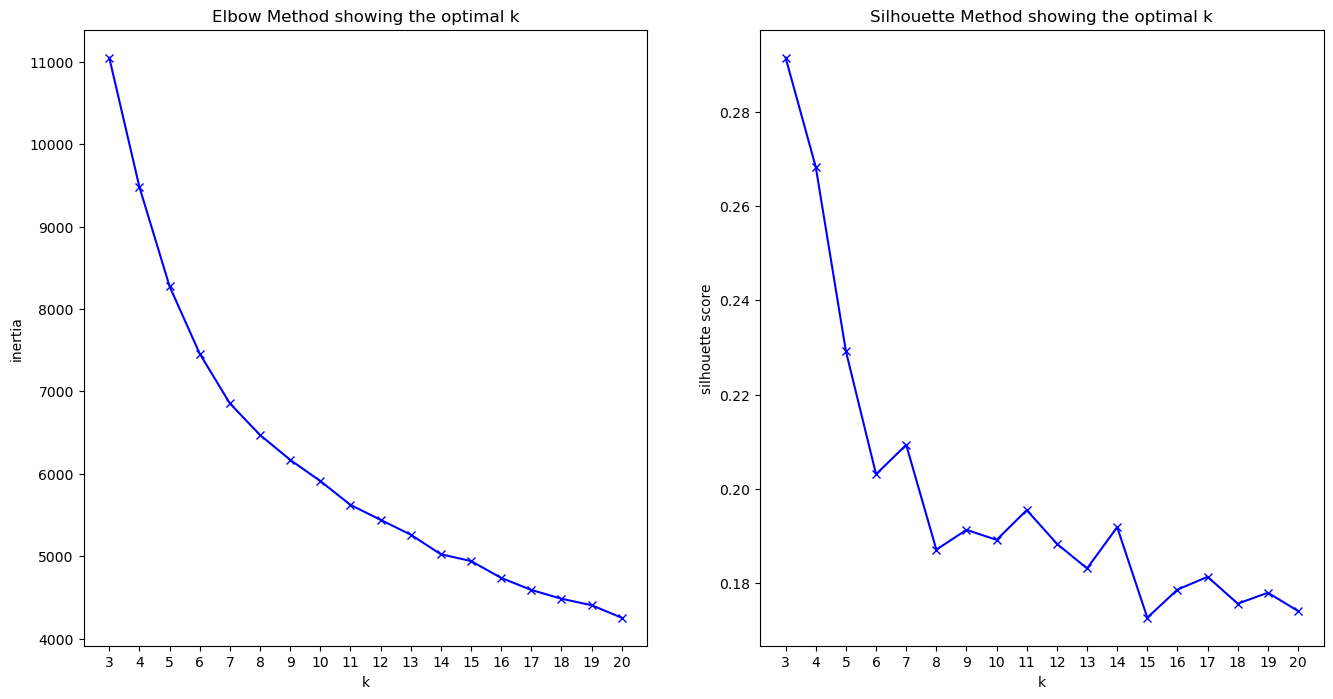

In [27]:
K = range(3, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1) # verbose = 1 to see the progress
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename. # name: kmeans_n.pickle
    # save all models and then we pick the first one, we don't need to train it again,
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0)) # steps of 1.0
ax[0].set_title('Elbow Method showing the optimal k')

ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

k = 13

### Loading scaler for best model

In [28]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: # specific python error message
        print("File not found!") # it will print this error ONLY for the error specify.

In [34]:
# load scaler
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [30]:
# load best model
best_model = load("kmeans_13.pickle")

In [35]:
X

,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature
0,0.644,0.735,0.05210,0.144000,0.418,88.980,4
1,0.517,0.675,0.45900,0.000000,0.518,203.853,4
2,0.707,0.681,0.06320,0.000005,0.646,117.999,4
3,0.898,0.676,0.14000,0.000000,0.742,147.991,4
4,0.668,0.758,0.48300,0.000019,0.834,147.989,3
...,...,...,...,...,...,...,...
2335,0.620,0.869,0.61500,0.000000,0.597,126.019,4
2336,0.572,0.949,0.00165,0.000195,0.530,118.974,4
2337,0.929,0.667,0.01850,0.000000,0.274,126.998,4
2338,0.816,0.513,0.01450,0.000102,0.170,96.981,4


In [40]:
# for the user
user_features_scaled = scaler2.transform(X)
user_features_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
clusters = best_model.predict(user_features_scaled_df)

In [91]:
clusters

array([10, 12, 11, ..., 11,  7,  5])

In [44]:
silhouette_score(user_features_scaled_df, best_model.predict(user_features_scaled_df))

0.18314113261889214

In [42]:
# we don't have control on the cluster labels
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

0     149
1     345
2     192
3      69
4      69
5     257
6     250
7     235
8     144
9      69
10    240
11    185
12    136
dtype: int64

Clusters to big df or to numerical

In [43]:
# clusters added to dataframe with only audio features
X["KMeans"] = clusters # add a column in the original dataframe with the cluster labels
X.head(10) # might be better to attach it to big df

C:\Users\marta\AppData\Local\Temp\ipykernel_19656\2627159938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["KMeans"] = clusters # add a column in the original dataframe with the cluster labels


,danceability,energy,acousticness,instrumentalness,valence,tempo,time_signature,KMeans
0,0.644,0.735,0.0521,0.144000,0.418,88.980,4,10
1,0.517,0.675,0.4590,0.000000,0.518,203.853,4,12
2,0.707,0.681,0.0632,0.000005,0.646,117.999,4,11
3,0.898,0.676,0.1400,0.000000,0.742,147.991,4,5
4,0.668,0.758,0.4830,0.000019,0.834,147.989,3,3
5,0.715,0.620,0.4170,0.000000,0.172,97.950,4,7
6,0.799,0.802,0.4290,0.001280,0.811,107.008,4,1
7,0.531,0.525,0.2320,0.000000,0.502,66.900,4,7
8,0.817,0.440,0.0603,0.000001,0.544,142.024,4,11
9,0.696,0.809,0.2520,0.000128,0.857,132.962,4,1


In [86]:
# clusters to all_songs_clean df
all_songs_clean['KMeans'] = clusters

In [88]:
all_songs_clean.head()

,titles,artists,ids,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,time_signature,dataset,KMeans
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,153947,4,hot,10
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,163855,4,hot,12
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,200455,4,hot,11
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,172125,4,hot,5
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,165671,3,hot,3


### DBSCAN

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [52]:
# simple 
#model = DBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
#yhat = model.fit_predict(X_scaled_df)
#print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),3))

The Silhouette score of the model is:  -0.395


In [ ]:
#X['DBSCAN'] = yhat
#X.head()
#clusters = np.unique(yhat)

#### Fine tuning

In order to find out the best value for **$\epsilon$**, we follow these steps:

1. Compute the distance matrix between the all the observations
2. We fix the number of nearest neighbours **k** to MinPoints= 2*number_of_features
3. We get all the distances from each point to it's k-nearest-neighbourgh.
4. We sort all those distances in descending order.
5. We plot those distances.

Step 1

In [47]:
d = distance_matrix(X_scaled_df,X_scaled_df) # compute the distances
print(d)

[[0.         4.62829401 1.85494217 ... 2.63716805 2.20035832 2.18571763]
 [4.62829401 0.         3.65473436 ... 4.26788081 4.88271227 4.9685012 ]
 [1.85494217 3.65473436 0.         ... 2.13913591 2.39365334 1.78765874]
 ...
 [2.63716805 4.26788081 2.13913591 ... 0.         1.5789174  2.42435182]
 [2.20035832 4.88271227 2.39365334 ... 1.5789174  0.         2.5256544 ]
 [2.18571763 4.9685012  1.78765874 ... 2.42435182 2.5256544  0.        ]]


Step 2

We need to sort this matrix by row and to ignore the first element as it is the distance to every point to itself (ie. 0)

In [48]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 0.98025804  1.07757551  1.14069095 ... 11.344198   11.58890126
  12.17889955]
 [ 1.02731243  1.0607812   1.19614622 ... 11.65440546 11.71151773
  11.89843166]
 [ 0.33475258  0.35665457  0.35763402 ... 11.4907235  11.7565088
  12.08304334]
 ...
 [ 0.41938436  0.46612716  0.59764208 ... 11.86145776 12.04123294
  12.3426408 ]
 [ 0.33795902  0.39398358  0.56167777 ... 11.40671441 11.55296759
  12.11111565]
 [ 0.54483854  0.7066554   0.73448906 ... 11.62971788 11.87479226
  12.5714483 ]]


Step 3


In this dataset we have two features. Therefore, we will set the MinPoints=2*2=4.

Then, the number of neighours in the neighbourhood will be set to four. How we can know a temptative value for the Epsilon? One way is to look at the biggest distance between each point and the MinPoints in the neighbourhood of the point. This will give us an idea how big are the distances in the dataset. Of course, the biggest distance in the neighbourhood of each point will be different for each point but will give us a rough idea of how to set the value for Epsilon.

We have computed the distance matrix. Let's get the fourht highest distance of each point (we have set the number of points in the neighbourhood to four). We select the 4-th column, (ie. the distance from each point to it's 4-th nearest neighbourgh (Remember that in Python the indexes starts at 0, therefore the 4th neighbourh corresponds to the 3rd index)

In [58]:
f = d2[:,13]
print(f) # The distances between every point and it's 4th nearest neighbour.

[1.24992351 1.49638774 0.56580834 ... 1.06624507 1.09327117 0.96690101]


Step 4

We sort the 4-th distances in descending order.

In [59]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[7.45568704 7.12018744 7.01994354 ... 0.47791618 0.47725974 0.44920817]


Step 5

We plot those distances and let's cross our fingers in search for a clear elbow.

C:\Users\marta\AppData\Local\Temp\ipykernel_19656\270027386.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


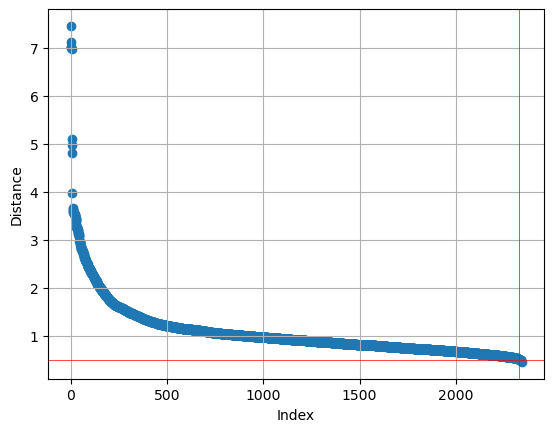

In [60]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

Values are between 1.3 and 3. Explore epsilon values:

#### Explore epsilon values

In [79]:
models = {}

for value in np.arange(1.3, 3.5, 0.1):
    model = DBSCAN(eps=value, min_samples=14) # min_samples = 2 * #features (7 features)
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df) # clusters: to which prediction will belong every cluster
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

In [74]:
pd.DataFrame(models)

,model_1.3,model_1.4,model_1.5,model_1.6,model_1.7,model_1.8,model_1.9,model_2.0,model_2.1,model_2.2,...,model_2.5,model_2.6,model_2.7,model_2.8,model_2.9,model_3.0,model_3.1,model_3.2,model_3.3,model_3.4
model,"DBSCAN(eps=1.3, min_samples=14)","DBSCAN(eps=1.4000000000000001, min_samples=14)","DBSCAN(eps=1.5000000000000002, min_samples=14)","DBSCAN(eps=1.6000000000000003, min_samples=14)","DBSCAN(eps=1.7000000000000004, min_samples=14)","DBSCAN(eps=1.8000000000000005, min_samples=14)","DBSCAN(eps=1.9000000000000006, min_samples=14)","DBSCAN(eps=2.000000000000001, min_samples=14)","DBSCAN(eps=2.1000000000000005, min_samples=14)","DBSCAN(eps=2.200000000000001, min_samples=14)",...,"DBSCAN(eps=2.500000000000001, min_samples=14)","DBSCAN(eps=2.6000000000000014, min_samples=14)","DBSCAN(eps=2.700000000000001, min_samples=14)","DBSCAN(eps=2.8000000000000016, min_samples=14)","DBSCAN(eps=2.9000000000000012, min_samples=14)","DBSCAN(eps=3.0000000000000018, min_samples=14)","DBSCAN(eps=3.1000000000000014, min_samples=14)","DBSCAN(eps=3.200000000000002, min_samples=14)","DBSCAN(eps=3.3000000000000016, min_samples=14)","DBSCAN(eps=3.400000000000002, min_samples=14)"
yhat,"[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
score,0.32,0.38,0.38,0.39,0.39,0.39,0.39,0.39,0.39,0.38,...,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38


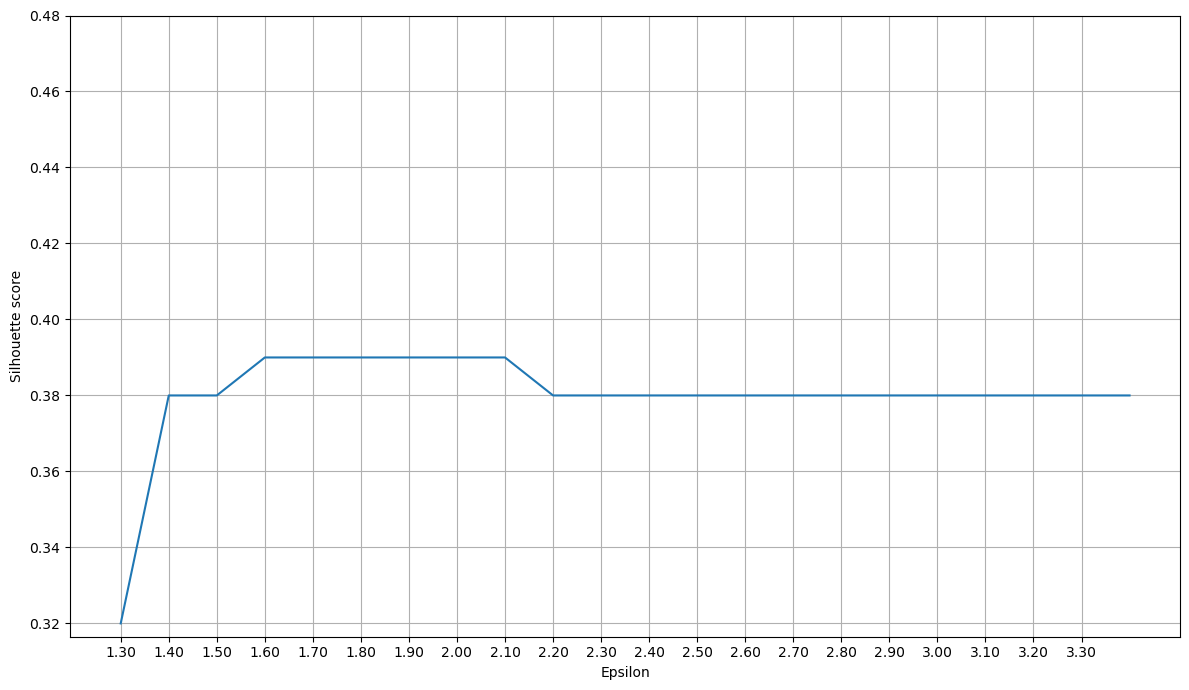

In [80]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(1.3, 3.5, 0.1)]
scores = [item[1]["score"] for item in list(models.items())]
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

We are looking for the epsilon value which give us the models with the highest Silhouette score. 

In [90]:
# check clusters of "best models" according to graph
clusters_dbscan = np.unique(models["model_2.1"]["yhat"])
clusters_dbscan

array([-1,  0,  1,  2], dtype=int64)

In [83]:
# retrieve unique clusters of one of the models
#clusters2 = np.unique(models["model_1.6"]["yhat"]) # 
#clusters2

array([-1,  0,  1], dtype=int64)

Add clusters to big dataframe

In [94]:
all_songs_clean['DBSCAN'] = models['model_2.1']['yhat']
all_songs_clean.head()

,titles,artists,ids,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,time_signature,dataset,KMeans,DBSCAN
0,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,153947,4,hot,10,0
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,163855,4,hot,12,0
2,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,200455,4,hot,11,0
3,Princess Diana,Ice Spice & Nicki Minaj,0ZxhtATQ0a6EvQNZ0z6NKV,0.898,0.676,9,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,172125,4,hot,5,0
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,165671,3,hot,3,1


In [95]:
## Save dataframe with clusters
all_songs_clean.to_csv('all_songs_clusters.csv', index=False)

## Conclusions
- KMeans: based on the elbow method and the Silhouette score we decided to go for K=13
- DBSCAN: It doesn't seem to be the best method -> the best performing one: noise and too few clusters.